# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: March 13, 2024 by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

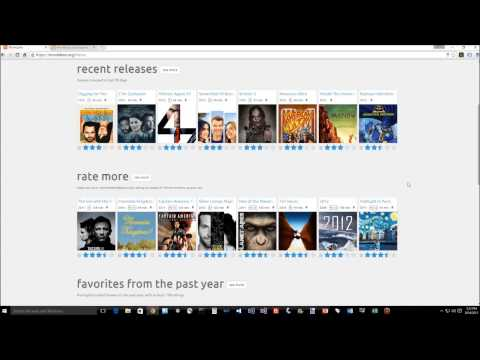

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:**

Please EDIT this cell and add the names of all the team members in your team:

    1. member 1
    
    2. member 2
    
    3. ...

 **Give your group a name**. For example: ***Data Detectives***

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:**
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total):

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------



In [4]:
# import csv files to separate dataframes
df_m = pd.read_csv('movies.dat', delimiter='::', engine='python', encoding = "ISO-8859-1", header=None, names=['MovieID','Title','Genres'])
df_r = pd.read_csv('ratings.dat', delimiter='::',engine='python', encoding = "ISO-8859-1", header=None, names=['UserID','MovieID','Rating','Timestamp'])
df_u = pd.read_csv('users.dat', delimiter='::',engine='python', encoding = "ISO-8859-1", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])

In [5]:
# create dataframe with job titles

jobs = {
    "JobTitle": [
        "other or not specified",
        "academic/educator",
        "artist",
        "clerical/admin",
        "college/grad student",
        "customer service",
        "doctor/health care",
        "executive/managerial",
        "farmer",
        "homemaker",
        "K-12 student",
        "lawyer",
        "programmer",
        "retired",
        "sales/marketing",
        "scientist",
        "self-employed",
        "technician/engineer",
        "tradesman/craftsman",
        "unemployed",
        "writer"
    ],
    "Occupation": list(range(0, 21))
}

df_jobs = pd.DataFrame(jobs)

In [6]:
# merge ratings + users
df_ru = pd.merge(df_r, df_u, on='UserID', how='left')
# merge (users + ratings) + movies
df_mru = pd.merge(df_ru, df_m, on='MovieID', how='left')
# merge (users + ratings + movies) + jobtitles
df_mru = pd.merge(df_mru,df_jobs, on='Occupation',how='left')

In [7]:
df_mru.head(5)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,JobTitle
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,K-12 student
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,K-12 student
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,K-12 student
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,K-12 student
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,K-12 student


In [8]:
# create dataframe with MovieID and Count of Ratings per Movie
df_ratings_per_movie = df_mru.groupby('MovieID')['UserID'].nunique()

# filter out Movies with < 100 Ratings
df_ratings_per_movie_over_100 = df_ratings_per_movie[df_ratings_per_movie >=100].index

# create dataframe with detail of df_mru for only movies reviewed more than 100 times
df_mru_over_100 = df_mru[df_mru['MovieID'].isin(df_ratings_per_movie_over_100)]



In [9]:
import time
from datetime import datetime

df_mru.to_hdf('movies_ratings_users_merged.h5', key='df_key', mode='w')

In [10]:
print(f'Movies Rated: ',df_mru['MovieID'].nunique())

Movies Rated:  3706


In [11]:
print(f'Users: ',df_mru['UserID'].nunique())

Users:  6040


In [12]:
print(f'Users: ',df_mru['Occupation'].nunique())

Users:  21


In [13]:
# averages by movie w/ title (all)

df_mru_avgs = df_mru.groupby(['MovieID', 'Title']).agg({'Rating': 'mean', 'UserID': 'count'}).reset_index()
df_mru_avgs.columns = [' '.join(col).strip() for col in df_mru_avgs.columns.values]
df_mru_avgs.columns = ['MovieID','Title','AvgRating','UserCount']
df_mru_avgs = df_mru_avgs.sort_values(by='AvgRating',ascending=False)

# averages by movie w/ title (>4.5)

df_mru_avgs_mean45 = df_mru_avgs[df_mru_avgs['AvgRating'] > 4.5]
df_mru_avgs_mean45 = df_mru_avgs_mean45.sort_values(by=['AvgRating','Title'],ascending=False)

In [14]:
# averages by movie w/ title (men only)

df_mru_m = df_mru[df_mru['Gender'] == 'M']
df_mru_avgs_m = df_mru_m.groupby(['MovieID', 'Title']).agg({'Rating': 'mean','UserID': 'count'}).reset_index()
df_mru_avgs_m.columns = [' '.join(col).strip() for col in df_mru_avgs_m.columns.values]
df_mru_avgs_m.columns = ['MovieID','Title','AvgRating','UserCount']
df_mru_avgs_m = df_mru_avgs_m.sort_values(by='AvgRating',ascending=False)

# averages by movie w/ title (men only, mean > 4.5)

df_mru_avgs_m_mean45 = df_mru_avgs_m[df_mru_avgs_m['AvgRating'] > 4.5]
df_mru_avgs_m_mean45 = df_mru_avgs_m_mean45.sort_values(by='AvgRating',ascending=False)

In [15]:
# averages by movie w/ title (women only)

df_mru_f = df_mru[df_mru['Gender'] == 'F']
df_mru_avgs_f = df_mru_f.groupby(['MovieID', 'Title']).agg({'Rating': 'mean','UserID': 'count'}).reset_index()
df_mru_avgs_f.columns = [' '.join(col).strip() for col in df_mru_avgs_f.columns.values]
df_mru_avgs_f.columns = ['MovieID','Title','AvgRating','UserCount']
df_mru_avgs_f = df_mru_avgs_f.sort_values(by='AvgRating',ascending=False)

# averages by movie w/ title (women only, mean > 4.5)

df_mru_avgs_f_mean45 = df_mru_avgs_f[df_mru_avgs_f['AvgRating'] > 4.5]
df_mru_avgs_f_mean45 = df_mru_avgs_f_mean45.sort_values(by='AvgRating',ascending=False)

In [16]:
# median by movie w/ title (men > 30)
df_mru_m_over35 = df_mru_m[(df_mru_m['Age'] >= 35)]
df_mru_avgs_m_over35 = df_mru_m_over35.groupby(['MovieID', 'Title']).agg({'Rating': 'median','UserID': 'count'}).reset_index()
df_mru_avgs_m_over35.columns = [' '.join(col).strip() for col in df_mru_avgs_m_over35.columns.values]
df_mru_avgs_m_over35.columns = ['MovieID','Title','MedianRating','UserCount']

# median by movie w/ title (men > 30, median > 4.5)
df_mru_avgs_m_over35_median45 = df_mru_avgs_m_over35[df_mru_avgs_m_over35['MedianRating'] > 4.5]
df_mru_avgs_m_over35_median45 = df_mru_avgs_m_over35_median45.sort_values(by='MedianRating',ascending=False)

In [17]:
# medians by movie w/ title (women > 30)

df_mru_f_over35 = df_mru_f[(df_mru_f['Age'] >= 35)]
df_mru_avgs_f_over35 = df_mru_f_over35.groupby(['MovieID', 'Title']).agg({'Rating': ['mean','median'],'UserID': 'count'}).reset_index()
df_mru_avgs_f_over35.columns = [' '.join(col).strip() for col in df_mru_avgs_f_over35.columns.values]
df_mru_avgs_f_over35.columns = ['MovieID','Title','AvgRating','MedianRating','UserCount']

# median by movie w/ title (women, median > 4.5)
df_mru_avgs_f_over35_median45 = df_mru_avgs_f_over35[df_mru_avgs_f_over35['MedianRating'] > 4.5]
df_mru_avgs_f_over35_median45 = df_mru_avgs_f_over35_median45.sort_values(by='AvgRating',ascending=False)

In [18]:
# Question 1 Answers
print(f"1a. How many movies have an average rating > 4.5? \033[1m{len(df_mru_avgs_mean45)}\033[0m\n")
print(f"1Ba. How many movies have an average rating > 4.5 among men? \033[1m{len(df_mru_avgs_m_mean45)}\033[0m\n")
print(f"1Bb. How many movies have an average rating > 4.5 among women? \033[1m{len(df_mru_avgs_f_mean45)}\033[0m\n")
print(f"1Ca. How many movies have a median rating > 4.5 among men over 30? \033[1m{len(df_mru_avgs_m_over35_median45)}\033[0m\n")
print(f"1Cb. How many movies have a median rating > 4.5 among women over 30? \033[1m{len(df_mru_avgs_f_over35_median45)}\033[0m\n")

1a. How many movies have an average rating > 4.5? 21

1Ba. How many movies have an average rating > 4.5 among men? 23

1Bb. How many movies have an average rating > 4.5 among women? 51

1Ca. How many movies have a median rating > 4.5 among men over 30? 86

1Cb. How many movies have a median rating > 4.5 among women over 30? 149



In [19]:
##### Most Popular Movies among ALL USERS

#create column for Product of UserCount and AvgRating
df_mru_avgs = df_mru_avgs.assign(Product=df_mru_avgs['UserCount'] * df_mru_avgs['AvgRating'])

#sort df_mru_avgs by Product in desc order
df_mru_avgs = df_mru_avgs.sort_values(by='Product', ascending=False)

In [20]:
##### Most Popular Movies among MEN
#create column for Product of UserCount and AvgRating
df_mru_avgs_m = df_mru_avgs_m.assign(Product=df_mru_avgs_m['UserCount'] * df_mru_avgs_m['AvgRating'])

#sort df_mru_avgs by Product in desc order
df_mru_avgs_m = df_mru_avgs_m.sort_values(by='Product', ascending=False)

In [21]:
##### Most Popular Movies among WOMEN
#create column for Product of UserCount and AvgRating
df_mru_avgs_f = df_mru_avgs_f.assign(Product=df_mru_avgs_f['UserCount'] * df_mru_avgs_f['AvgRating'])

#sort df_mru_avgs by Product in desc order
df_mru_avgs_f = df_mru_avgs_f.sort_values(by='Product', ascending=False)

In [22]:
# using the product of UserCount and AvgRating to sort for top ten movies accounts
# for both the average rating (rated quality) and the ubiquity (# of ratings)

print("1D. What are the ten most popular movies?\n")
print("\033[4mTen Most Popular Movies\033[0m")
for i in range (1,11):
    if i in df_mru_avgs.index:
        row_data = df_mru_avgs.iloc[i]
        print(f"{i}. {row_data['Title']} - {row_data['AvgRating'].round(3)} avg from {row_data['UserCount'].round(3)} ratings")
    else:
        print(f"No row at index {i}")

print("\n\033[4mTen Most Popular Movies for Men\033[0m")
for i in range (1,11):
    if i in df_mru_avgs_m.index:
        row_data = df_mru_avgs_m.iloc[i]
        print(f"{i}. {row_data['Title']} - {row_data['AvgRating'].round(3)} avg from {row_data['UserCount'].round(3)} ratings")
    else:
        print(f"No row at index {i}")

print("\n\033[4mTen Most Popular Movies for Women\033[0m")
for i in range (1,11):
    if i in df_mru_avgs_f.index:
        row_data = df_mru_avgs_f.iloc[i]
        print(f"{i}. {row_data['Title']} - {row_data['AvgRating'].round(3)} avg from {row_data['UserCount'].round(3)} ratings")
    else:
        print(f"No row at index {i}")


1D. What are the ten most popular movies?

Ten Most Popular Movies
1. Star Wars: Episode IV - A New Hope (1977) - 4.454 avg from 2991 ratings
2. Star Wars: Episode V - The Empire Strikes Back (1980) - 4.293 avg from 2990 ratings
3. Star Wars: Episode VI - Return of the Jedi (1983) - 4.023 avg from 2883 ratings
4. Saving Private Ryan (1998) - 4.337 avg from 2653 ratings
5. Raiders of the Lost Ark (1981) - 4.478 avg from 2514 ratings
6. Silence of the Lambs, The (1991) - 4.352 avg from 2578 ratings
7. Matrix, The (1999) - 4.316 avg from 2590 ratings
8. Sixth Sense, The (1999) - 4.406 avg from 2459 ratings
9. Terminator 2: Judgment Day (1991) - 4.059 avg from 2649 ratings
10. Fargo (1996) - 4.255 avg from 2513 ratings

Ten Most Popular Movies for Men
1. Star Wars: Episode IV - A New Hope (1977) - 4.495 avg from 2344 ratings
2. Star Wars: Episode V - The Empire Strikes Back (1980) - 4.345 avg from 2342 ratings
3. Saving Private Ryan (1998) - 4.399 avg from 2078 ratings
4. Star Wars: Episod

In [23]:
# create pivots by Gender, Age, and Job Title separately

df_AvgRatingsByGender = pd.pivot_table(df_mru, values=['Rating', 'UserID'], index = 'Gender', aggfunc={'Rating': 'mean', 'UserID': ['nunique', 'count']})
df_AvgRatingsByAge = pd.pivot_table(df_mru, values=['Rating', 'UserID'], index = 'Age', aggfunc={'Rating': 'mean', 'UserID': ['nunique', 'count']})
df_AvgRatingsByJobTitle = pd.pivot_table(df_mru, values=['Rating', 'UserID'], index = 'JobTitle', aggfunc={'Rating': 'mean', 'UserID': ['nunique', 'count']})

# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)
# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)
# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)

df_AvgRatingsByGender.columns = ['AvgRating','Ratings','Users']
df_AvgRatingsByAge.columns = ['AvgRating','Ratings','Users']
df_AvgRatingsByJobTitle.columns = ['AvgRating','Ratings','Users']


# sort in descending order to determine most "easy to please" demographics
df_AvgRatingsByGender = df_AvgRatingsByGender.sort_values(by='AvgRating', ascending=False)
df_AvgRatingsByAge = df_AvgRatingsByAge.sort_values(by='AvgRating', ascending=False)
df_AvgRatingsByJobTitle = df_AvgRatingsByJobTitle.sort_values(by='AvgRating', ascending=False)


print(f"{df_AvgRatingsByGender}\n")
print("A simple breakdown of average rating by gender indicates that women are easier to please than men.\n")
print(f"{df_AvgRatingsByAge}\n")
print("A simple breakdown of average rating by age indicates that older people are easier to please.\n")
print(f"{df_AvgRatingsByJobTitle}\n")
print("A simple breakdown of average rating by occupation indicates that retired people are easiest to please.\n")


        AvgRating  Ratings  Users
Gender                           
F        3.620366   246440   1709
M        3.568879   753769   4331

A simple breakdown of average rating by gender indicates that women are easier to please than men.

     AvgRating  Ratings  Users
Age                           
56    3.766632    38780    380
50    3.714512    72490    496
45    3.638062    83633    550
35    3.618162   199003   1193
1     3.549520    27211    222
25    3.545235   395556   2096
18    3.507573   183536   1103

A simple breakdown of average rating by age indicates that older people are easier to please.

                        AvgRating  Ratings  Users
JobTitle                                         
retired                  3.781736    13754    142
scientist                3.689774    22951    144
doctor/health care       3.661578    37205    236
homemaker                3.656589    11345     92
clerical/admin           3.656516    31623    173
programmer               3.654001    5

In [24]:
# create pivots by Gender, Age, and Job Title Together

df_AvgRatingsByDemographic = pd.pivot_table(
    df_mru,
    values=['Rating', 'UserID'],
    index=['Gender', 'Age', 'JobTitle'],
    aggfunc={'Rating': 'mean', 'UserID': ['nunique', 'count']}
)

# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)
# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)
# df_AvgRatingsByGender['Rating'] = df_AvgRatingsByGender['Rating'].round(4)

# sort in ascending order to determine most "easy to please" demographics
df_AvgRatingsByDemographic.columns = ['AvgRating','Ratings','Users']
df_AvgRatingsByDemographic = df_AvgRatingsByDemographic.sort_values(by='AvgRating', ascending=False)

print(f"a more granular breakdown of average rating, number of ratings, and number of users by all provided demographics provides further insight.")
print(f"apparently the easiest demographic to please is one female child in an executive/managerial occupation.\n")

print (df_AvgRatingsByDemographic.head(20))


a more granular breakdown of average rating, number of ratings, and number of users by all provided demographics provides further insight.
apparently the easiest demographic to please is one female child in an executive/managerial occupation.

                                 AvgRating  Ratings  Users
Gender Age JobTitle                                       
F      1   executive/managerial   4.702703       74      1
       56  writer                 4.522388       67      1
           lawyer                 4.483871       62      1
       45  lawyer                 4.471910       89      2
       50  sales/marketing        4.395257      253      4
           technician/engineer    4.301205       83      3
           tradesman/craftsman    4.224265      272      2
M      50  scientist              4.218478      920      8
F      56  self-employed          4.200000      675      5
       18  scientist              4.164502      462      1
       50  customer service       4.141975      

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [25]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

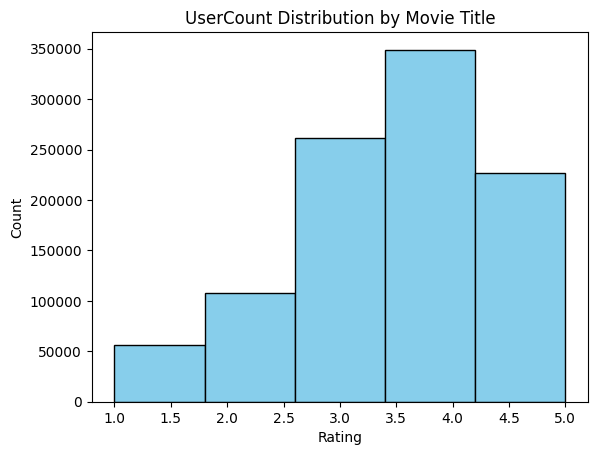

In [26]:
# Histogram
plt.hist(df_mru['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('UserCount Distribution by Movie Title')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

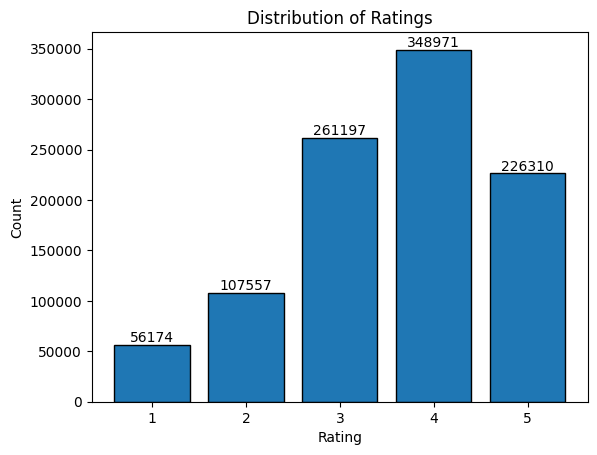

In [27]:
# The histogram doesn't seem to line up appropriately; the bar chart below looks more accurate.
rating_counts = df_mru['Rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

for i, count in enumerate(rating_counts):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')

plt.show()

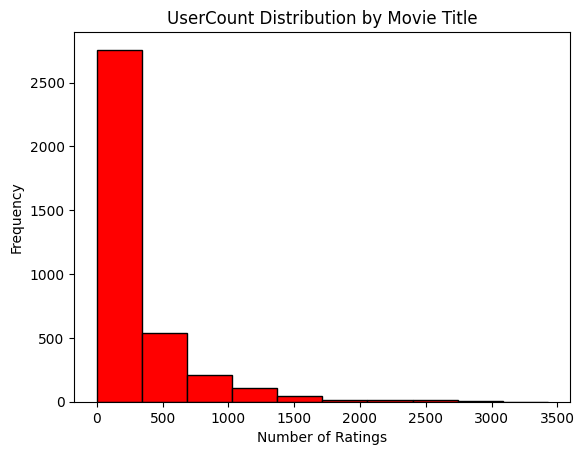

In [28]:
# Counting Number of Ratings per Movie

df_mru_avgs = df_mru_avgs.sort_values(by='UserCount', ascending=True)

# Plotting histogram
plt.hist(df_mru_avgs['UserCount'], bins=10, color='red', edgecolor='black')
plt.title('UserCount Distribution by Movie Title')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

plt.show()

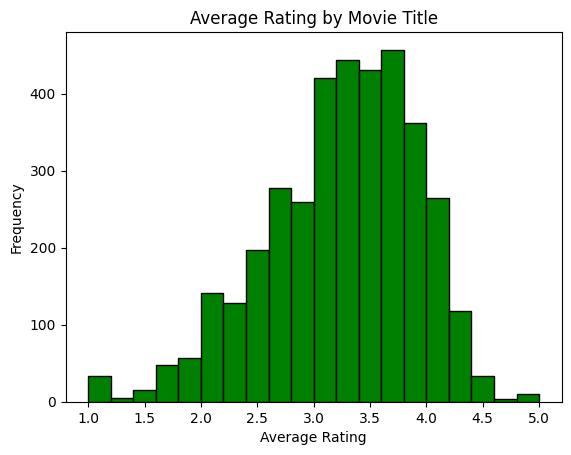

In [29]:
# Average Rating per Movie

df_mru_avgs = df_mru_avgs.sort_values(by='UserCount', ascending=True)

# Plotting histogram
plt.hist(df_mru_avgs['AvgRating'], bins=20, color='green', edgecolor='black')
plt.title('Average Rating by Movie Title')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()

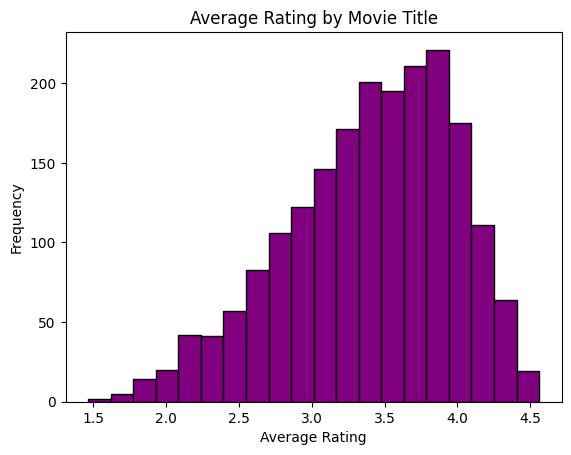

In [30]:
n = 100

df_mru_avgs_N_orMore = df_mru_avgs[df_mru_avgs['UserCount'] > n]
df_mru_avgs_N_orMore = df_mru_avgs_N_orMore.sort_values(by='AvgRating', ascending=True)

# Average Rating per Movie with more than n ratings

df_mru_avgs_N_orMore = df_mru_avgs_N_orMore.sort_values(by='UserCount', ascending=True)

# Plotting histogram
plt.hist(df_mru_avgs_N_orMore['AvgRating'], bins=20, color='purple', edgecolor='black')
plt.title('Average Rating by Movie Title')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()

In [31]:
# Removing the movies that were reviewed less than 100 times cut off the outlier 'tails'.
#  if I am looking for movies that are technically more "popular"
#  then I would want to remove the movies reviewed less than 100 times.
#  However, that might remove some "hidden gems" from consideration.

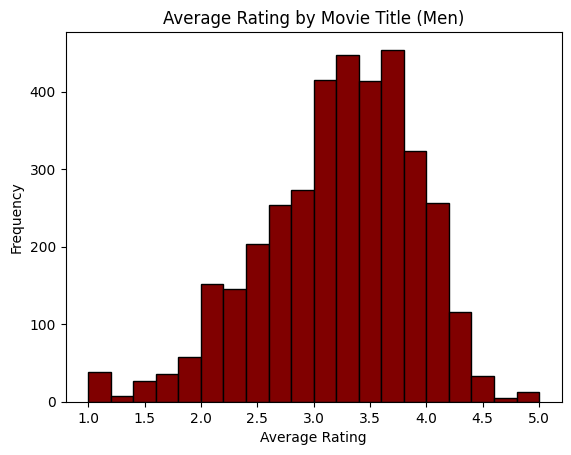

In [32]:
# Average Rating per Movie (Men)

df_mru_avgs_m = df_mru_avgs_m.sort_values(by='UserCount', ascending=True)

# Plotting histogram
plt.hist(df_mru_avgs_m['AvgRating'], bins=20, color='maroon', edgecolor='black')
plt.title('Average Rating by Movie Title (Men)')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()

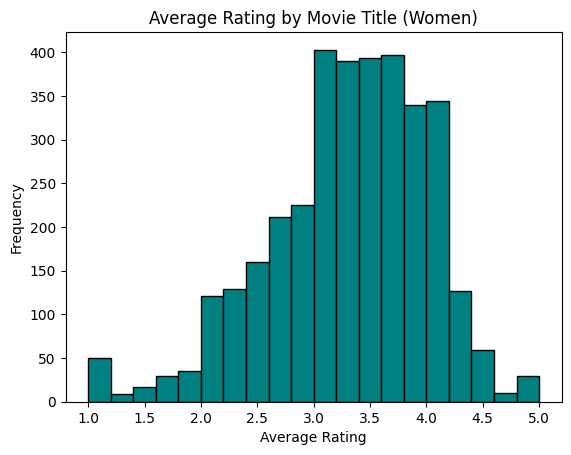

In [33]:
# Average Rating per Movie (Women)

df_mru_avgs_f = df_mru_avgs_f.sort_values(by='UserCount', ascending=True)

# Plotting histogram
plt.hist(df_mru_avgs_f['AvgRating'], bins=20, color='teal', edgecolor='black')
plt.title('Average Rating by Movie Title (Women)')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [34]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

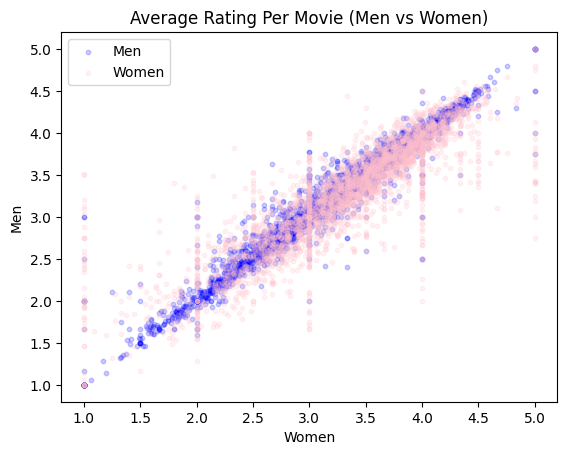

In [35]:
review = df_mru.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

x_men = review["M"]
x_women = review["F"]
y = df_mru.pivot_table(values='Rating', index='MovieID', aggfunc='mean')


# Compute the correlation coefficient
corr_coef = review['M'].corr(review['F'])

plt.scatter(x_men, y, c="blue", s=10, alpha=0.2, label="Men")
plt.scatter(x_women, y, c="pink", s=10, alpha=0.2, label="Women")

plt.title("Average Rating Per Movie (Men vs Women)")
plt.xlabel("Women")
plt.ylabel("Men")
plt.legend()
plt.show()

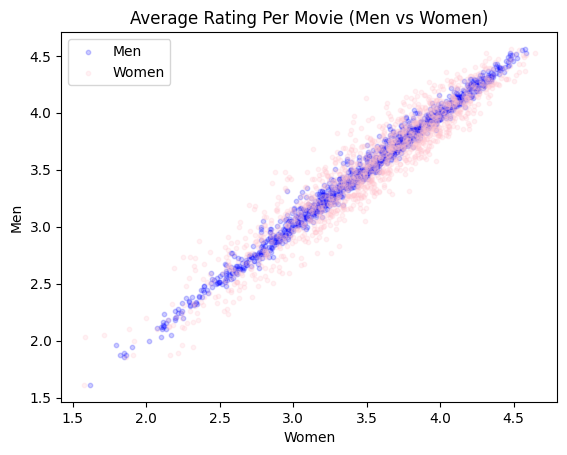

In [36]:
movie_ratings_counts = df_mru['MovieID'].value_counts()
popular_movie_ids = movie_ratings_counts[movie_ratings_counts > 200].index
df_mru_filtered = df_mru[df_mru['MovieID'].isin(popular_movie_ids)]

# Create a pivot table
review_filtered = df_mru_filtered.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

x_men = review_filtered["M"]
x_women = review_filtered["F"]
y = df_mru_filtered.pivot_table(values='Rating', index='MovieID', aggfunc='mean')

# Scatter plot
plt.scatter(x_men, y, c="blue", s=10, alpha=0.2, label="Men")
plt.scatter(x_women, y, c="pink", s=10, alpha=0.2, label="Women")

plt.title("Average Rating Per Movie (Men vs Women)")
plt.xlabel("Women")
plt.ylabel("Men")
plt.legend()
plt.show()

In [222]:
# Create a pivot table for Men and Women ratings
df_gender = df_mru.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

# Compute the correlation coefficient
corr_coef_filtered = review_filtered['M'].corr(review_filtered['F'])

print(f"Correlation Coefficient between Men and Women: {corr_coef}")
print(f"Correlation Coefficient between Men and Women (100+ Ratings): {corr_coef_filtered}")
print(f"There appears to be a relatively strong positive correlation, \nparticularly when you remove the outliers (Movies w/ 100+ Ratings).")

Correlation Coefficient between Men and Women: 0.8950019362703335
Correlation Coefficient between Men and Women (100+ Ratings): 0.9183613857026661
There appears to be a relatively strong positive correlation, 
particularly when you remove the outliers (Movies w/ 100+ Ratings).


In [38]:

review_age = df_mru.pivot_table(
    values='Rating',
    index=['MovieID', 'Age'],
    columns='Gender',
    aggfunc='mean')

review_age = review_age.dropna()

corr_coef_age = review_age.groupby(['Age']).apply(lambda x: x['M'].corr(x['F']))
corr_coef_age = corr_coef_age.reset_index(name='Corr_Coef')
corr_coef_age = corr_coef_age.sort_values(by='Corr_Coef', ascending=False)

print("Correlation Coefficients between Men and Women for different Age groups\n")
print(corr_coef_age)
print("\nThere isn't as high a correlation for individual age groups as there are between men and women as a whole.")
print("There is still a positive correlation between men and women for all age groups, particularly 25-34.")

Correlation Coefficients between Men and Women for different Age groups

   Age  Corr_Coef
2   25   0.686293
3   35   0.599398
1   18   0.575622
4   45   0.568988
5   50   0.536948
6   56   0.413094
0    1   0.347884

There isn't as high a correlation for individual age groups as there are between men and women as a whole.
There is still a positive correlation between men and women for all age groups, particularly 25-34.


In [39]:

review_job = df_mru.pivot_table(
    values='Rating',
    index=['MovieID', 'JobTitle'],
    columns='Gender',
    aggfunc='mean')

review_job = review_job.dropna()

corr_coef_job = review_job.groupby(['JobTitle']).apply(lambda x: x['M'].corr(x['F']))
corr_coef_job = corr_coef_job.reset_index(name='Corr_Coef')
corr_coef_job = corr_coef_job.sort_values(by='Corr_Coef', ascending=False)

print("Correlation Coefficients between Men and Women for different Job Titles")
print(corr_coef_job)
print("There is a pretty high positive correlation between men and women in academic/educator jobs and writers.")

Correlation Coefficients between Men and Women for different Job Titles
                  JobTitle  Corr_Coef
1        academic/educator   0.636358
20                  writer   0.606830
17     technician/engineer   0.579450
11  other or not specified   0.578786
7     executive/managerial   0.572696
4     college/grad student   0.572648
14         sales/marketing   0.533524
6       doctor/health care   0.518479
15               scientist   0.479621
2                   artist   0.472414
16           self-employed   0.468767
12              programmer   0.450084
3           clerical/admin   0.438775
19              unemployed   0.408122
10                  lawyer   0.394056
0             K-12 student   0.330526
5         customer service   0.329810
13                 retired   0.294298
18     tradesman/craftsman   0.276751
9                homemaker   0.276577
8                   farmer   0.275236
There is a pretty high positive correlation between men and women in academic/educator jobs 

In [40]:

# create df_mru_genre dataframe with one row per genre to allow for comparison of genre averages.
df_mru_genre = df_mru.assign(Genre=df_mru['Genres'].str.split('|')).explode('Genre')
df_mru_genre = df_mru_genre.drop('Genres', axis=1)


In [41]:

# create df_mru_over_100_genre dataframe with one row per genre to allow for comparison of genre averages.
df_mru_over_100_genre = df_mru_over_100.assign(Genre=df_mru_over_100['Genres'].str.split('|')).explode('Genre')
df_mru_over_100_genre = df_mru_over_100_genre.drop('Genres', axis=1)

In [237]:
# define dataset to use for future calculations (all or only over 100 ratings)

df_to_use = df_mru_over_100_genre

# make gender-specific dataframes to use in heat maps.
df_to_use_f = df_to_use[df_to_use['Gender'] == 'F']
df_to_use_m = df_to_use[df_to_use['Gender'] == 'M']


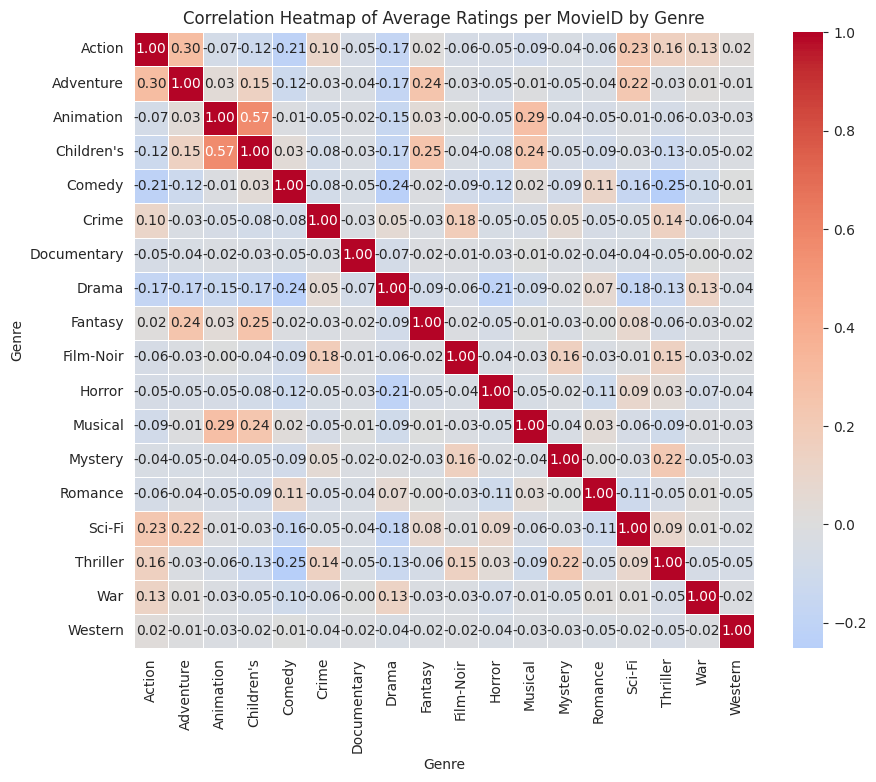

In [238]:
########## Genre Correlations

# Group by 'MovieID' and 'Genre and calculate the average rating
grouped_data = df_to_use.groupby(['MovieID', 'Genre'])['Rating'].mean().reset_index()

# Pivot the table so that each genre becomes a separate column
pivot_table = grouped_data.pivot(index='MovieID', columns='Genre', values='Rating').fillna(0)

# Calculate the correlation coefficients between average ratings of each genre
correlation_table = pivot_table.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=(0))
plt.title('Correlation Heatmap of Average Ratings per MovieID by Genre')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

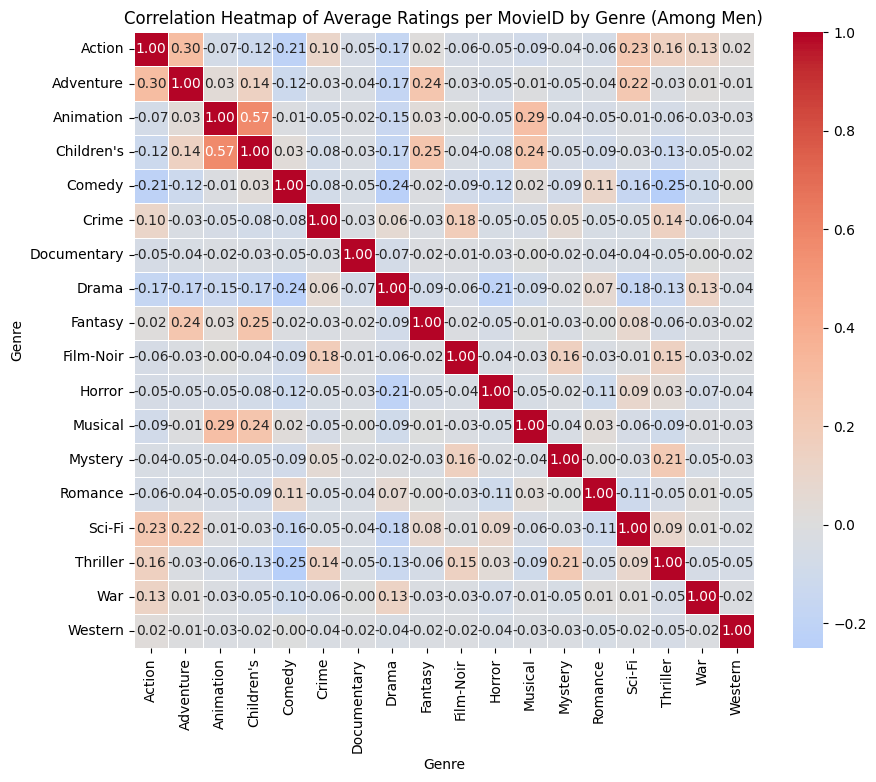

In [241]:
########## Genre Correlations among Men

# Group by 'MovieID' and 'Genre' and calculate the average rating
grouped_data = df_to_use_m.groupby(['MovieID', 'Genre'])['Rating'].mean().reset_index()

# Pivot the table so that each genre becomes a separate column
pivot_table = grouped_data.pivot(index='MovieID', columns='Genre', values='Rating').fillna(0)

# Calculate the correlation coefficients between average ratings of each genre
correlation_table_m = pivot_table.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table_m, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=(0))
plt.title('Correlation Heatmap of Average Ratings per MovieID by Genre (Among Men)')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

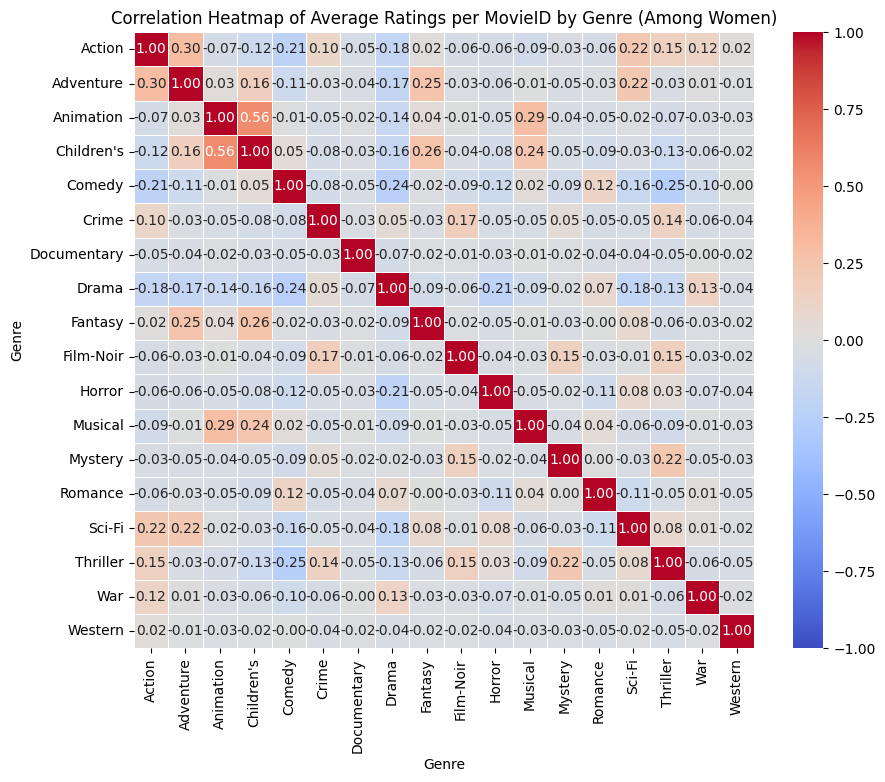

In [243]:
########## Genre Correlations among Women

# Group by 'MovieID' and 'Genre' and calculate the average rating
grouped_data = df_to_use_f.groupby(['MovieID', 'Genre'])['Rating'].mean().reset_index()

# Pivot the table so that each genre becomes a separate column
pivot_table = grouped_data.pivot(index='MovieID', columns='Genre', values='Rating').fillna(0)

# Calculate the correlation coefficients between average ratings of each genre
correlation_table_f = pivot_table.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table_f, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin= -1, vmax=1, center=(0))
plt.title('Correlation Heatmap of Average Ratings per MovieID by Genre (Among Women)')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

In [231]:
# pivot dataFrames to get average ratings for each combination of genre
genre_ratings = df_to_use.pivot_table(values='Rating', index=('MovieID','Genre'), columns='Gender', aggfunc='mean')
genre_ratings = genre_ratings.reset_index()
genre_ratings.columns.name = None
genre_ratings_detail = genre_ratings.drop(columns=['MovieID'])
genre_ratings_avg = genre_ratings.groupby('Genre').mean()
genre_ratings_avg = genre_ratings_avg.reset_index()
genre_ratings_avg.columns.name = None

,Genre,MovieID,F,M
0,Action,1916.664122,3.153751,3.199039
1,Adventure,1803.482927,3.249824,3.205592
2,Animation,1869.939759,3.542150,3.463130
3,Children's,1695.547619,3.292465,3.101971
4,Comedy,1971.865057,3.339679,3.283592
5,Crime,1874.629921,3.484420,3.541165
6,Documentary,1850.200000,3.902670,3.920066
7,Drama,1925.262069,3.640004,3.606397
8,Fantasy,1932.857143,3.261629,3.134995
9,Film-Noir,1820.689655,3.958974,4.052953


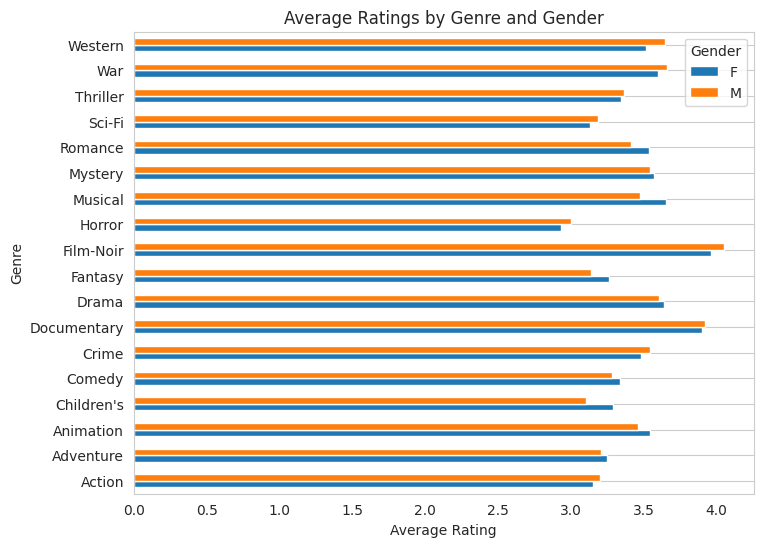

In [235]:
# Set Genre as index
#genre_ratings_avg.set_index('Genre', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for F and M values for each genre
genre_ratings_avg[['F', 'M']].plot(kind='barh', ax=ax)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Ratings by Genre and Gender')
plt.grid(axis='x')
plt.legend(title='Gender')

plt.show()

<ipython-input-217-483619b55ce2>:5: UserWarning: The palette list has more values (20) than needed (18), which may not be intended.
  scatterplot = sns.scatterplot(data=genre_ratings_avg, x='F', y='M', hue='Genre', s=20, alpha=1, palette=custom_palette)


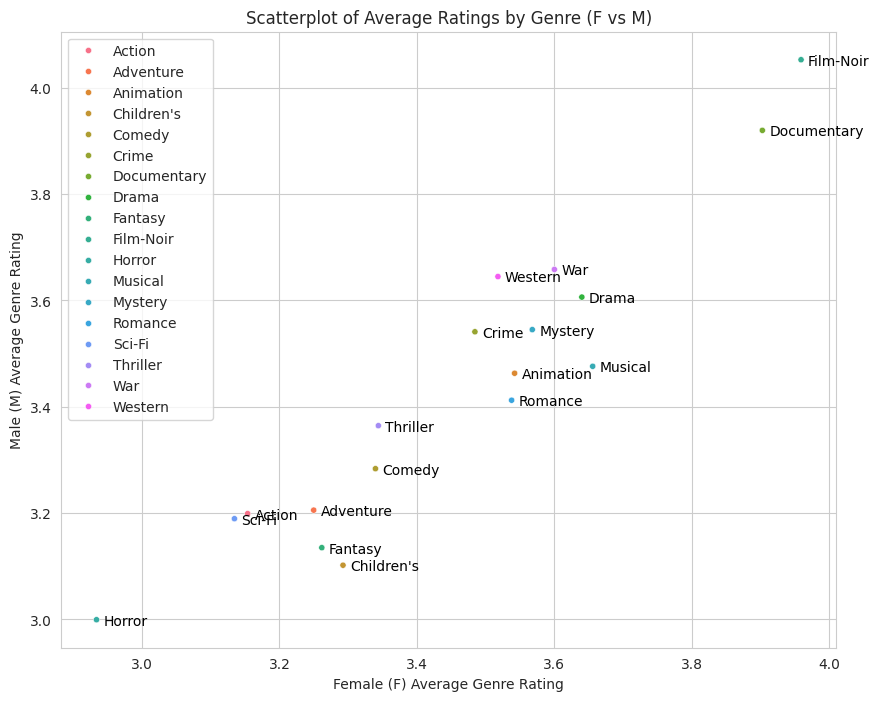

In [217]:
# define scatterplot for average ratings by genre
custom_palette = sns.color_palette("husl", 20)

plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=genre_ratings_avg, x='F', y='M', hue='Genre', s=20, alpha=1, palette=custom_palette)
plt.title(f'Scatterplot of Average Ratings by Genre (F vs M)')
plt.xlabel('Female (F) Average Genre Rating')
plt.ylabel('Male (M) Average Genre Rating')
plt.legend(title=None)

# add genre names to points
for genre, (x, y) in genre_ratings_avg[['F', 'M']].iterrows():
    scatterplot.text(x + 0.01, y - 0.01, genre, horizontalalignment='left', size='medium', color='black', weight='regular')

# show scatterplot
plt.show()

<ipython-input-210-acf99575a2e1>:4: UserWarning: The palette list has more values (20) than needed (18), which may not be intended.
  scatterplot = sns.scatterplot(data=genre_ratings_detail, x='F', y='M', hue='Genre', s=20, alpha=1, palette=custom_palette)


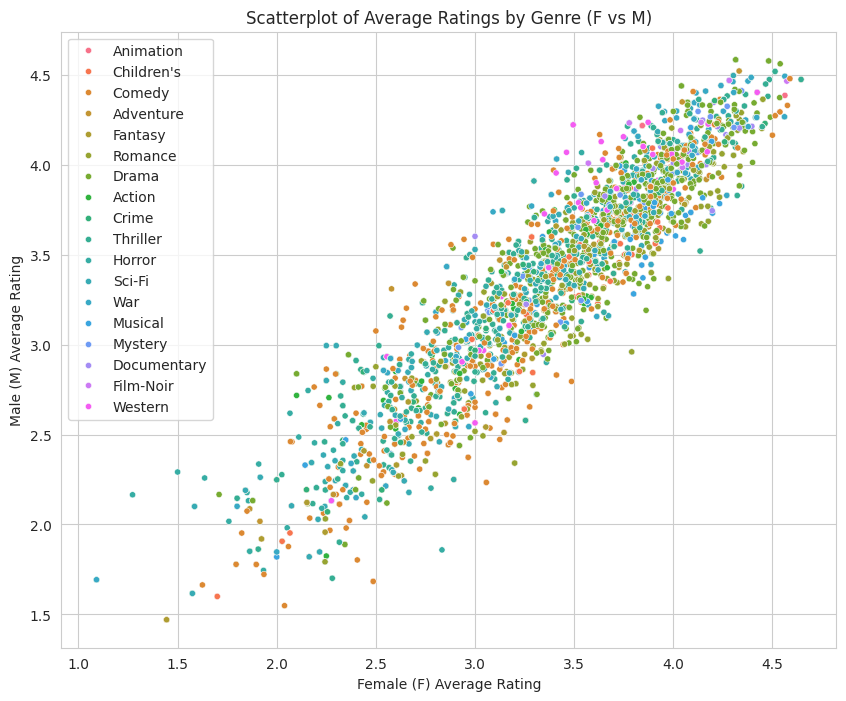

In [210]:
# define scatterplot for average ratings by genre by movie

plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=genre_ratings_detail, x='F', y='M', hue='Genre', s=20, alpha=1, palette=custom_palette)
plt.title(f'Scatterplot of Average Ratings by Genre (F vs M)')
plt.xlabel('Female (F) Movie Rating')
plt.ylabel('Male (M) Movie Rating')
plt.legend(title=None)

# Show the plot
plt.show()

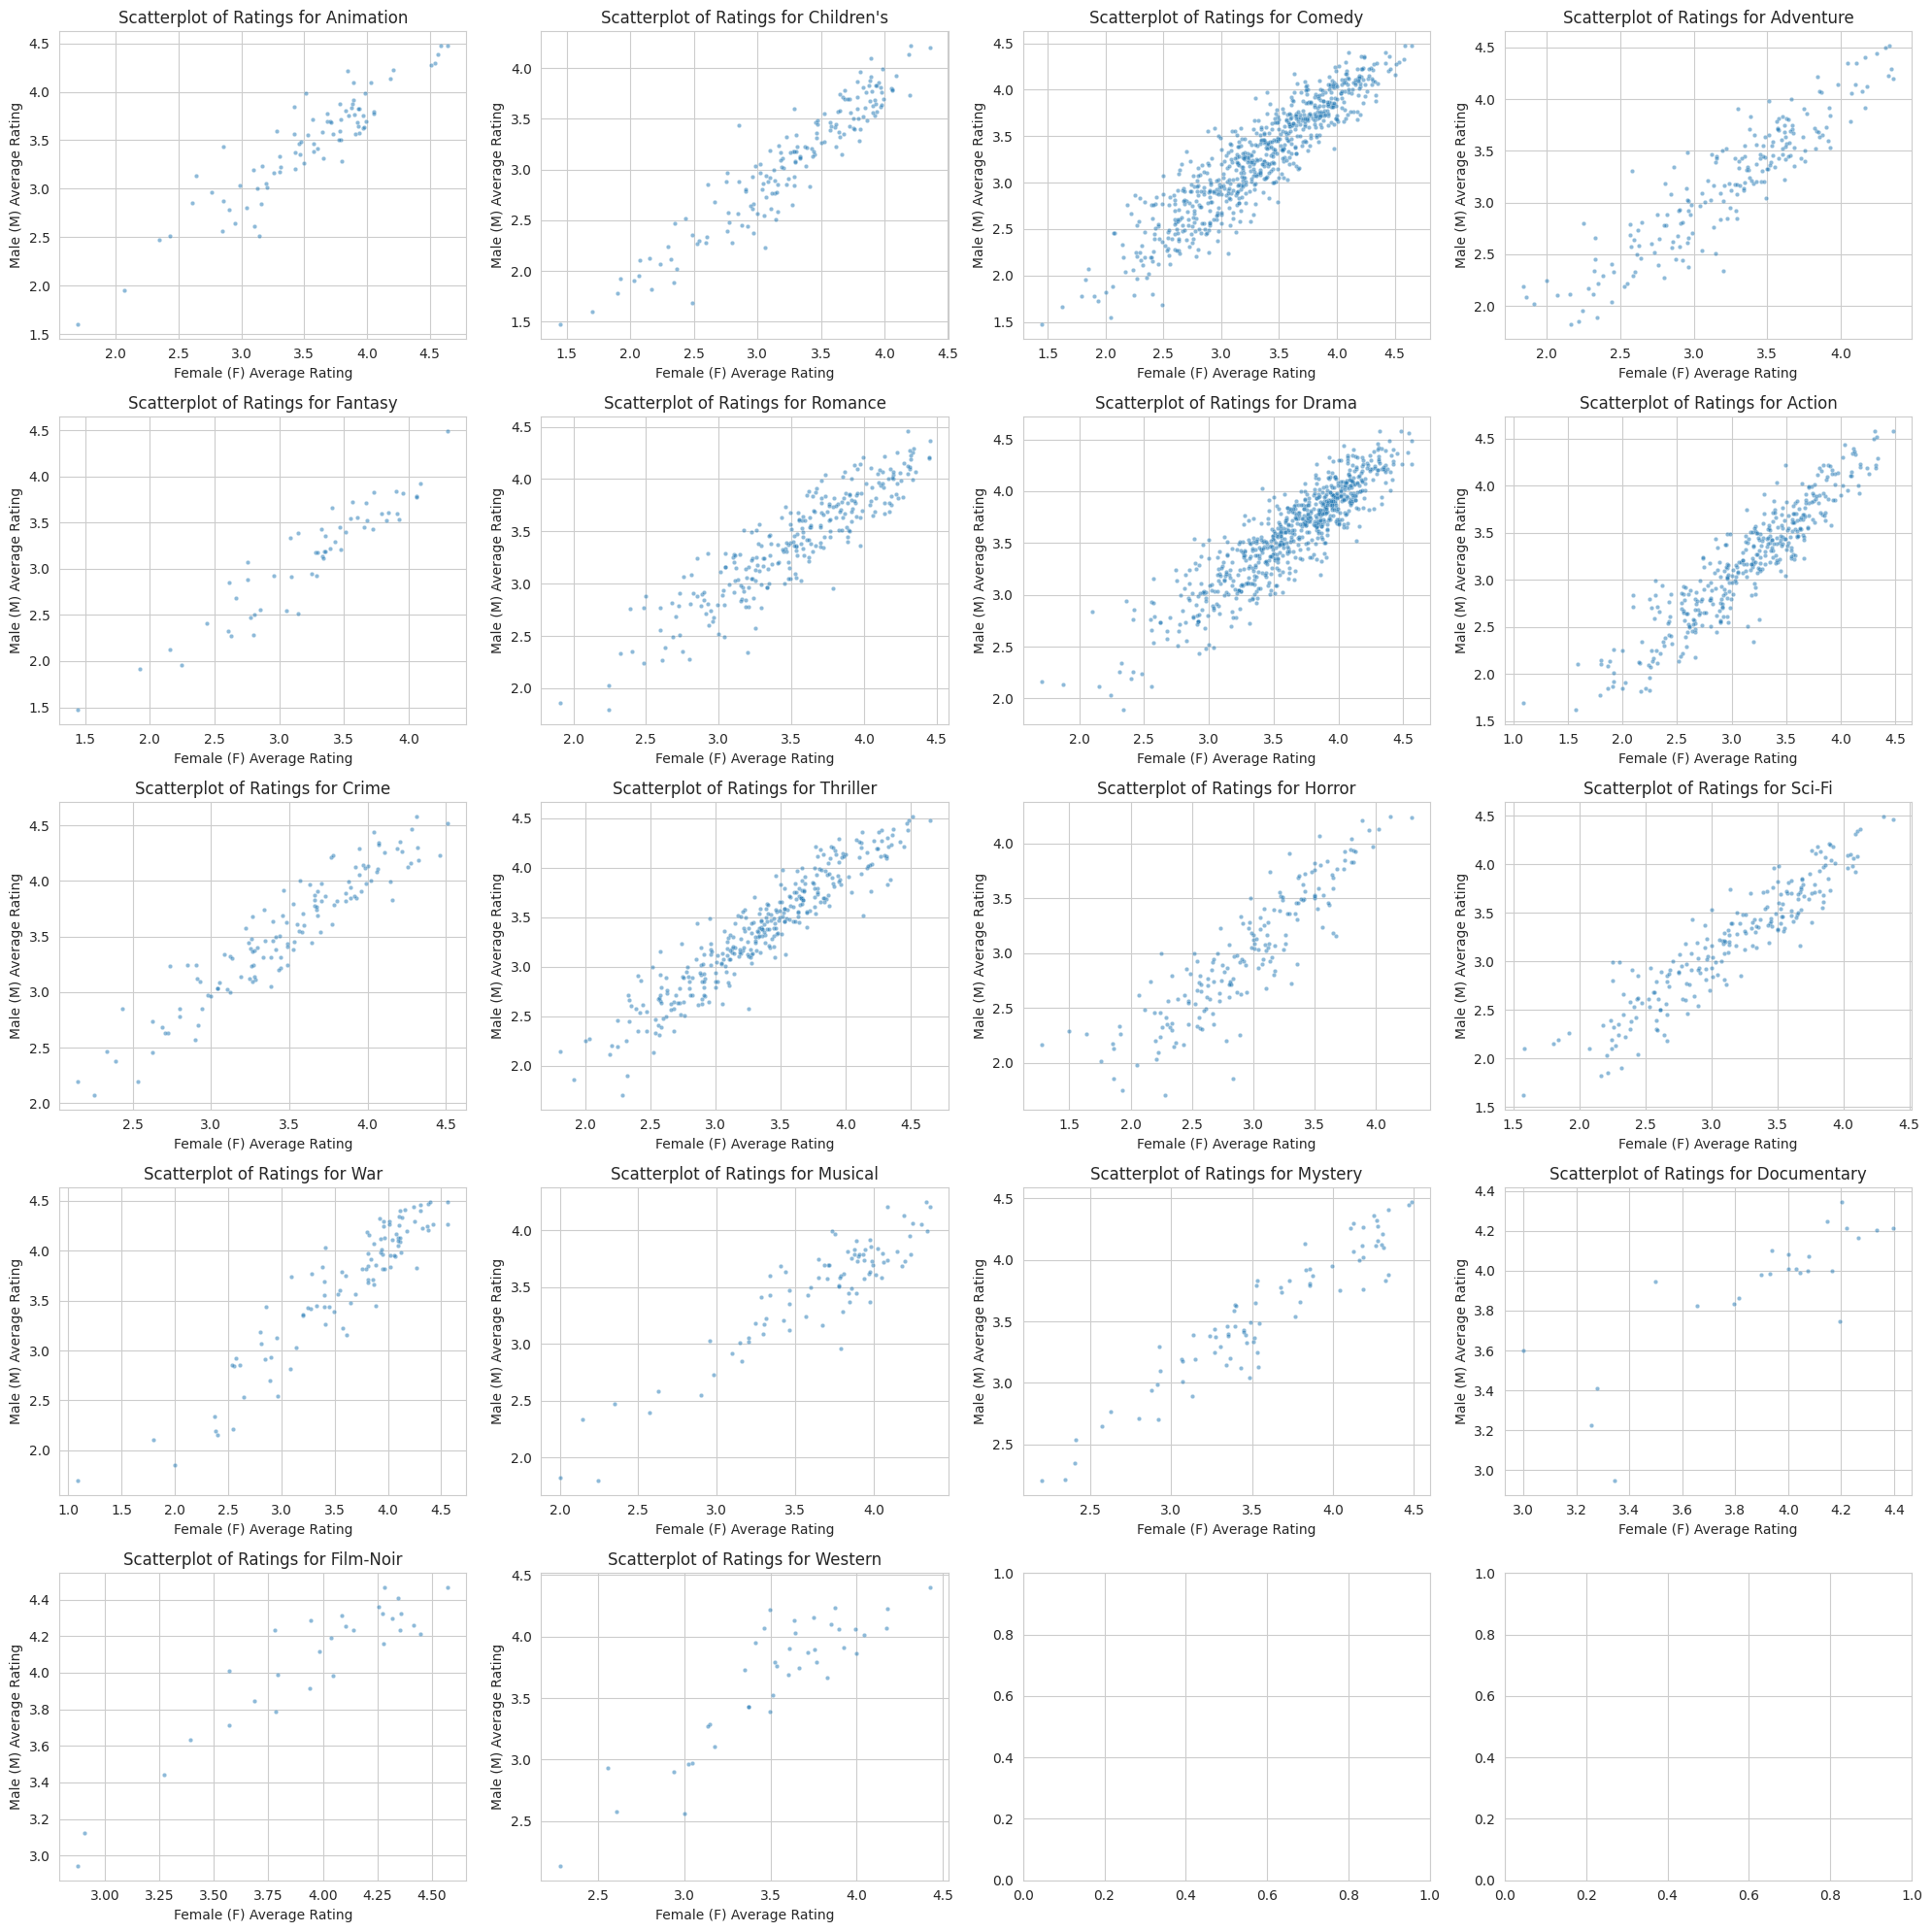

In [211]:

# separate genres into individual scatterplots to try to identify most regressive
# get list of genres
genres = genre_ratings['Genre'].unique()

# define grid to display scatterplots
n_rows = 5
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# create scatterplots
for i, genre in enumerate(genres):
    # Subset the data for the current genre
    genre_data = genre_ratings[genre_ratings['Genre'] == genre]

    # Plot the scatterplot for the current genre
    sns.scatterplot(data=genre_data, x='F', y='M', ax=axes[i], s=10, alpha=.5)

    # Set title and labels
    axes[i].set_title(f'Scatterplot of Ratings for {genre}')
    axes[i].set_xlabel('Female (F) Average Rating')
    axes[i].set_ylabel('Male (M) Average Rating')

# show plots
plt.tight_layout()
plt.show()

In [236]:
# look at correlation coefficients between ratings from men and ratings from women for a simpler look at above.

corr_coef_by_genre = genre_ratings_detail.groupby('Genre').apply(lambda x: x['F'].corr(x['M'])).reset_index()
corr_coef_by_genre.columns = ['Genre', 'Correlation_Coefficient']
corr_coef_by_genre = corr_coef_by_genre.sort_values(by='Correlation_Coefficient',ascending=False)

# Display the DataFrame
corr_coef_by_genre

,Genre,Correlation_Coefficient
12,Mystery,0.943078
3,Children's,0.939561
5,Crime,0.939452
15,Thriller,0.938670
8,Fantasy,0.937460
16,War,0.934888
14,Sci-Fi,0.929027
9,Film-Noir,0.927215
0,Action,0.922605
2,Animation,0.918077


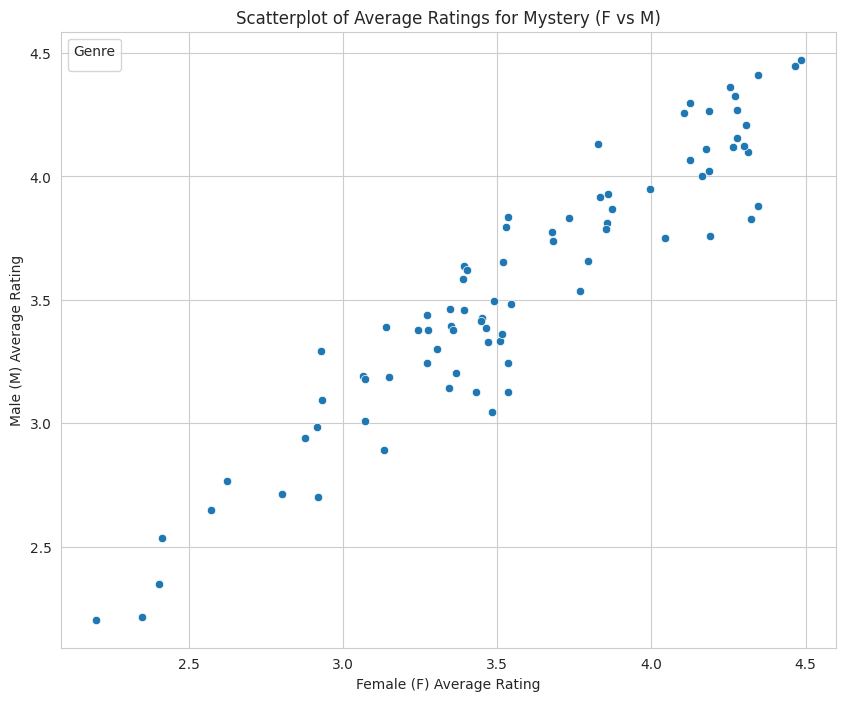

In [205]:
# filter genre to Mystery for a closer look
genre_data = genre_ratings[genre_ratings['Genre'] == 'Mystery']

# define the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=genre_data, x='F', y='M')
plt.title(f'Scatterplot of Average Ratings for Mystery (F vs M)')
plt.xlabel('Female (F) Average Rating')
plt.ylabel('Male (M) Average Rating')
plt.legend(title='Genre')
plt.show()

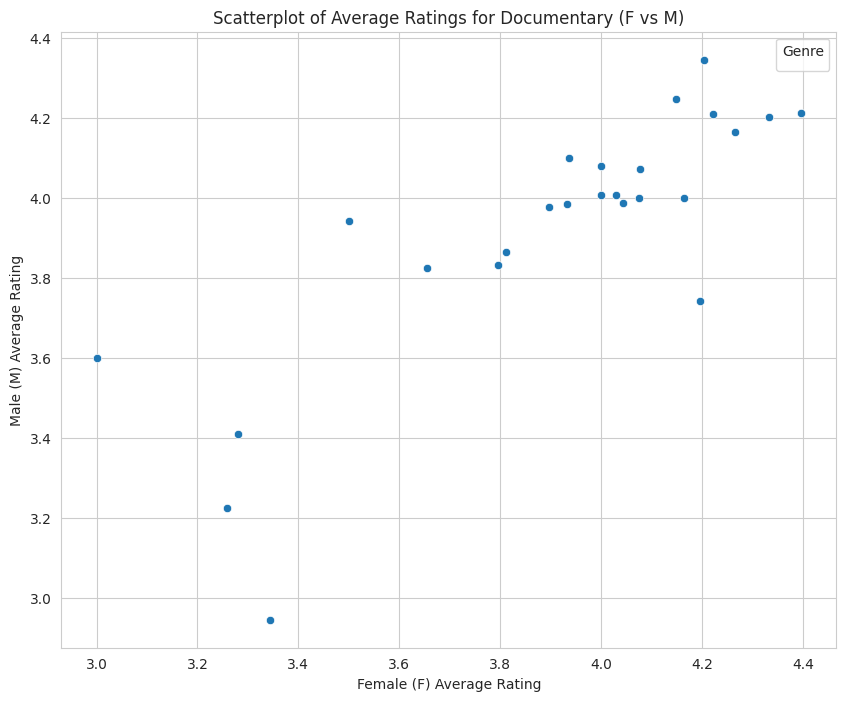

In [239]:
# filter genre to Documentary for a closer look
genre_data = genre_ratings[genre_ratings['Genre'] == 'Documentary']

# Define the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=genre_data, x='F', y='M')
plt.title(f'Scatterplot of Average Ratings for Documentary (F vs M)')
plt.xlabel('Female (F) Average Rating')
plt.ylabel('Male (M) Average Rating')
plt.legend(title='Genre')
plt.show()

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~





# Report: communicate the results (15 points)

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you.

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**